In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [37]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [38]:
class_names = ['Tshirt',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [39]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

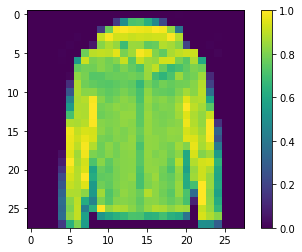

In [40]:
plt.imshow(X_train[0])
plt.colorbar()

In [41]:
from keras.regularizers import l1, l2

In [86]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [87]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [89]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7728 - accuracy: 0.7392 - val_loss: 0.5307 - val_accuracy: 0.8218
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5127 - accuracy: 0.8199 - val_loss: 0.4584 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4605 - accuracy: 0.8380 - val_loss: 0.4368 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4320 - accuracy: 0.8479 - val_loss: 0.4359 - val_accuracy: 0.8494
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4134 - accuracy: 0.8548 - val_loss: 0.4035 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3951 - accuracy: 0.8612 - val_loss: 0.3836 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3822 - accuracy: 0.8651 - val_loss: 0.3790 - val_accuracy:

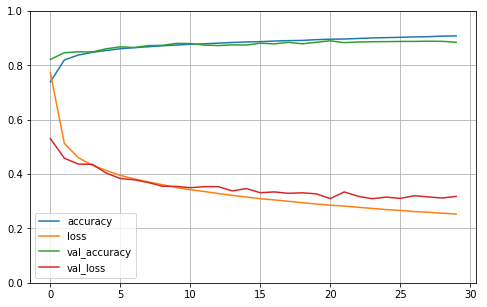

In [90]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [91]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 84.3413 - accuracy: 0.8177


[84.34127044677734, 0.8177000284194946]

In [92]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [93]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3554 - accuracy: 0.8694 - val_loss: 0.3348 - val_accuracy: 0.8752
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3250 - accuracy: 0.8799 - val_loss: 0.3408 - val_accuracy: 0.8770
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.8860 - val_loss: 0.3333 - val_accuracy: 0.8732
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2875 - accuracy: 0.8936 - val_loss: 0.3095 - val_accuracy: 0.8868
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2760 - accuracy: 0.8964 - val_loss: 0.3285 - val_accuracy: 0.8768
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2643 - accuracy: 0.9015 - val_loss: 0.3260 - val_accuracy: 0.8826
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2525 - accuracy: 0.9042 - val_loss: 0.2972 - val_accuracy:

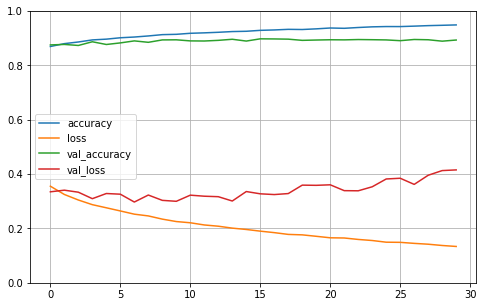

In [94]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [95]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 82.2057 - accuracy: 0.8676


[82.20572662353516, 0.8676000237464905]

In [81]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation = "relu",activity_regularizer = l2(0.0001)))
model.add(keras.layers.Dense(100,activation = "relu",activity_regularizer = l2(0.0001)))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [82]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [83]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5130 - accuracy: 0.8228 - val_loss: 0.4084 - val_accuracy: 0.8536
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3822 - accuracy: 0.8637 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.8769 - val_loss: 0.3321 - val_accuracy: 0.8844
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3229 - accuracy: 0.8844 - val_loss: 0.3588 - val_accuracy: 0.8742
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3051 - accuracy: 0.8906 - val_loss: 0.3528 - val_accuracy: 0.8748
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2920 - accuracy: 0.8960 - val_loss: 0.3291 - val_accuracy: 0.8834
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.8993 - val_loss: 0.3175 - val_accuracy:

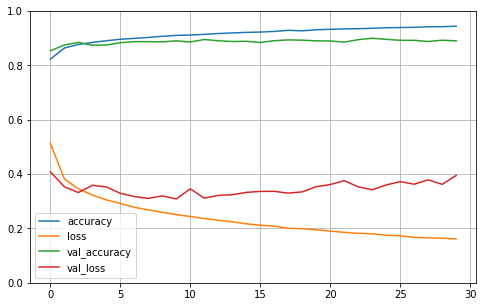

In [84]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [85]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 820.8973 - accuracy: 0.8396


[820.8972778320312, 0.8396000266075134]

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]